# **Aplicación de técnicas de machine learning para la predicción del riesgo de default de un cliente en una compañía de filipinas**

Realizado por: 

* Andrés Medina Báez       cc 1036654885
* Manuela Ramírez Quiceno  cc 1037657504

# 1.Introducción






Home Credit es una empresa de filipinas que busca ofrecer créditos a personas con antecedentes crediticios insuficientes o inexistentes, buscando la inclusión financiera de la población no bancarizada.

Para ello, esta compañía busca utilizar información transaccional y de telecomunicaciones, con el fin de predecir el riesgo de default de sus clientes.


**Principal Objetivo**: ¿Al cliente, le debo o no de otorgar el préstamo a partir de su riesgo de default? 


**Variable Objetivo**: Probabilidad de que el cliente presente retrasos en el pago de su cuota  (1) o no (0)

# 2.Importar librerias

Las librerías a usar en la carga de los datos son:



*   pandas: Para cargar los datos en dataframes.
*   numpy: Para operaciones con matrices, filas y/o columnas
*   matplotlib: Para graficar
*   os: Para interactuar con diferentes rutas
*plotly: Para graficar la matriz de correlación
*google: Para decargar el data de salida

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import plotly.express as px
from google.colab import files


# 3.Cargar la Data

Se carga el archivo de salida del notebook 11-Limpieza_Datos_62cols.ipynb

In [2]:
data = pd.read_csv("12-DF_Final_62cols.csv",index_col=0) # Read data
data_original=data.copy()
data.head(5)

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,DAYS_BIRTH,MONTHS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,...,NAME_PORTFOLIO_Cash,NAME_PORTFOLIO_POS,NAME_PRODUCT_TYPE_walk-in,ind_vel_monto_cr,WALLSMATERIAL_MODE_DUROS,WALLSMATERIAL_MODE_ARMABLES,OCCUPATION_TYPE_BAJO,OCCUPATION_TYPE_MEDIO,OCCUPATION_TYPE_ALTO,indice_falta_pagar
0,100002,1,0,0.0,202500.0,406597.5,26.0,21.0,2,0.262949,...,0.0,1.0,0.0,1.000000,1,0,1,0,0,0.284122
1,100003,0,0,0.0,270000.0,1293502.5,46.0,40.0,1,0.622246,...,1.0,2.0,0.0,1.000000,1,0,0,1,0,0.000000
2,100004,0,1,0.0,67500.0,135000.0,52.0,8.0,2,0.555912,...,0.0,1.0,0.0,1.000000,0,0,1,0,0,0.000000
3,100006,0,0,0.0,135000.0,312682.5,52.0,101.0,2,0.650442,...,3.0,2.0,0.0,1.000000,0,0,1,0,0,0.000000
4,100007,0,0,0.0,121500.0,513000.0,55.0,101.0,2,0.322738,...,4.0,2.0,1.0,1.037038,0,0,0,1,0,0.000000


In [3]:
data.shape

(295237, 62)

In [4]:
#Variables a Convertir en Cualitativas
data['DEF_30_CNT_SOCIAL_CIRCLE']=data['DEF_30_CNT_SOCIAL_CIRCLE'].apply(lambda x: 1 if x>0 else 0)
data['DEF_60_CNT_SOCIAL_CIRCLE']=data['DEF_60_CNT_SOCIAL_CIRCLE'].apply(lambda x: 1 if x>0 else 0)
data['CREDIT_TYPE_Microloan']=data['CREDIT_TYPE_Microloan'].apply(lambda x: 1 if x>0 else 0)
data['CREDIT_TYPE_Mortgage']=data['CREDIT_TYPE_Mortgage'].apply(lambda x: 1 if x>0 else 0)
data['NAME_CLIENT_TYPE_New']=data['NAME_CLIENT_TYPE_New'].apply(lambda x: 1 if x>0 else 0)

In [5]:
Category=['TARGET','NAME_INCOME_TYPE_Businessman','NAME_INCOME_TYPE_Commercial associate',\
          'NAME_INCOME_TYPE_Others','NAME_INCOME_TYPE_Pensioner',\
          'NAME_INCOME_TYPE_Working','NAME_EDUCATION_TYPE_Higher education',\
          'NAME_EDUCATION_TYPE_Incomplete higher','NAME_EDUCATION_TYPE_Lower secondary',\
          'NAME_EDUCATION_TYPE_Secondary / secondary special','NAME_HOUSING_TYPE_House / apartment',\
          'NAME_HOUSING_TYPE_Rented apartment','NAME_HOUSING_TYPE_With parents',\
          'FONDKAPREMONT_MODE_org spec account','FONDKAPREMONT_MODE_reg oper account',\
          'FONDKAPREMONT_MODE_reg oper spec account','HOUSETYPE_MODE_specific housing',\
          'WALLSMATERIAL_MODE_Others','WALLSMATERIAL_MODE_DUROS','WALLSMATERIAL_MODE_ARMABLES',\
          'OCCUPATION_TYPE_BAJO','OCCUPATION_TYPE_MEDIO','OCCUPATION_TYPE_ALTO',\
          'DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','CREDIT_TYPE_Microloan','CREDIT_TYPE_Mortgage',\
          'NAME_CLIENT_TYPE_New','FLAG_OWN_CAR','REGION_RATING_CLIENT_W_CITY',\
          'NAME_INCOME_TYPE_State servant','HOUSETYPE_MODE_block of flats']

Float=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT_x','DAYS_BIRTH','MONTHS_EMPLOYED',\
       'EXT_SOURCE_2','DAYS_CREDIT',\
       'AMT_CREDIT_SUM_OVERDUE','DAYS_CREDIT_UPDATE','CREDIT_ACTIVE_Active','CREDIT_ACTIVE_Closed',\
       'CREDIT_TYPE_Another type of loan','CREDIT_TYPE_Consumer credit',\
       'AMT_ANNUITY','RATE_DOWN_PAYMENT',\
       'AMT_DOWN_PAYMENT','CNT_PAYMENT','DAYS_DECISION','DAYS_FIRST_DRAWING',\
       'DAYS_TERMINATION','NAME_CONTRACT_STATUS_Approved',\
       'NAME_CONTRACT_STATUS_Canceled','NAME_CONTRACT_STATUS_Refused',\
       'NAME_PORTFOLIO_Cards','NAME_PORTFOLIO_Cash',\
       'NAME_PORTFOLIO_POS','NAME_PRODUCT_TYPE_walk-in','ind_vel_monto_cr','indice_falta_pagar']

Int=['SK_ID_CURR']

In [6]:
for i in Category: 
  data[i]=data[i].astype('category')

for i in Float: 
  data[i]=data[i].astype('float64')

for i in Int: 
  data[i]=data[i].astype('int64')

In [7]:
data.info() #category(32), float64(29), int64(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295237 entries, 0 to 295236
Data columns (total 62 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   SK_ID_CURR                                         295237 non-null  int64   
 1   TARGET                                             295237 non-null  category
 2   FLAG_OWN_CAR                                       295237 non-null  category
 3   CNT_CHILDREN                                       295237 non-null  float64 
 4   AMT_INCOME_TOTAL                                   295237 non-null  float64 
 5   AMT_CREDIT_x                                       295237 non-null  float64 
 6   DAYS_BIRTH                                         295237 non-null  float64 
 7   MONTHS_EMPLOYED                                    295237 non-null  float64 
 8   REGION_RATING_CLIENT_W_CITY                        295237 non-nu

# 3.Preprocesamiento #2

A partir del paso a paso realizado en los notebooks 
* 00_Carga_de_datos
* 02_Limpieza_de_los_Datos

Se obtuvo un dataset final de 297.237 filas x 62 columnas. Antes de comenzar con el paso final de modelamiento, se realiza una verificación final del paso de preprocesamiento, esto con el fin de garantizar que la data a modelar sea la correcta y lo más limpia  posible. 

## 3.1 Integración


Se realizó en el notebook 00_Carga_de_datos

## 3.2 Eliminación de variables redundantes e irrelevantes


In [8]:
data.drop(columns=['SK_ID_CURR'],inplace=True)

In [9]:
data.shape

(295237, 61)

## 3.3 Descripción Estadística de las variables

In [10]:
Categoricas=['TARGET','NAME_INCOME_TYPE_Businessman','NAME_INCOME_TYPE_Commercial associate',\
          'NAME_INCOME_TYPE_Others','NAME_INCOME_TYPE_Pensioner',\
          'NAME_INCOME_TYPE_Working','NAME_EDUCATION_TYPE_Higher education',\
          'NAME_EDUCATION_TYPE_Incomplete higher','NAME_EDUCATION_TYPE_Lower secondary',\
          'NAME_EDUCATION_TYPE_Secondary / secondary special','NAME_HOUSING_TYPE_House / apartment',\
          'NAME_HOUSING_TYPE_Rented apartment','NAME_HOUSING_TYPE_With parents',\
          'FONDKAPREMONT_MODE_org spec account','FONDKAPREMONT_MODE_reg oper account',\
          'FONDKAPREMONT_MODE_reg oper spec account','HOUSETYPE_MODE_specific housing',\
          'WALLSMATERIAL_MODE_Others','WALLSMATERIAL_MODE_DUROS','WALLSMATERIAL_MODE_ARMABLES',\
          'OCCUPATION_TYPE_BAJO','OCCUPATION_TYPE_MEDIO','OCCUPATION_TYPE_ALTO',\
          'DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','CREDIT_TYPE_Microloan','CREDIT_TYPE_Mortgage',\
          'NAME_CLIENT_TYPE_New','FLAG_OWN_CAR','REGION_RATING_CLIENT_W_CITY',\
          'NAME_INCOME_TYPE_State servant','HOUSETYPE_MODE_block of flats']


Cuantitativas=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT_x','DAYS_BIRTH','MONTHS_EMPLOYED',\
       'EXT_SOURCE_2','DAYS_CREDIT',\
       'AMT_CREDIT_SUM_OVERDUE','DAYS_CREDIT_UPDATE','CREDIT_ACTIVE_Active','CREDIT_ACTIVE_Closed',\
       'CREDIT_TYPE_Another type of loan','CREDIT_TYPE_Consumer credit',\
       'AMT_ANNUITY','RATE_DOWN_PAYMENT',\
       'AMT_DOWN_PAYMENT','CNT_PAYMENT','DAYS_DECISION','DAYS_FIRST_DRAWING',\
       'DAYS_TERMINATION','NAME_CONTRACT_STATUS_Approved',\
       'NAME_CONTRACT_STATUS_Canceled','NAME_CONTRACT_STATUS_Refused',\
       'NAME_PORTFOLIO_Cards','NAME_PORTFOLIO_Cash',\
       'NAME_PORTFOLIO_POS','NAME_PRODUCT_TYPE_walk-in','ind_vel_monto_cr','indice_falta_pagar']

### 3.3.1 Revisar baja variabilidad

In [11]:
baja_std=[]
baja_cv=[]

for i in Cuantitativas:
  desvest=data[i].std()
  prom=abs(data[i].mean())
  cv=desvest/prom
  if desvest<0.05:
    baja_std.append(i)
  if cv<0.10:
    baja_cv.append(i)

In [12]:
baja_std, baja_cv

([], [])

### 3.3.2 Revisar distribución por variable

#####3.3.2.1 Cuantitativas

data[Cuantitativas[0:10]+['TARGET']].groupby('TARGET').agg(['mean'])

Prueba Anova basado en la distribución F

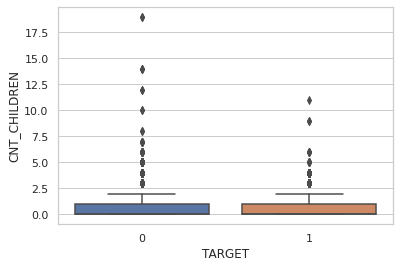

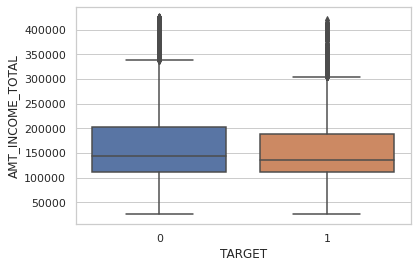

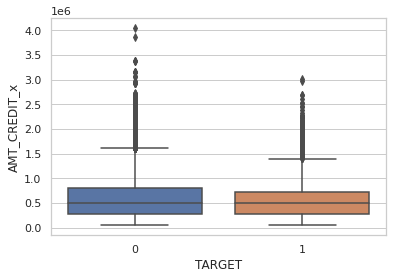

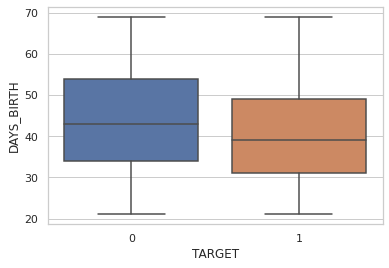

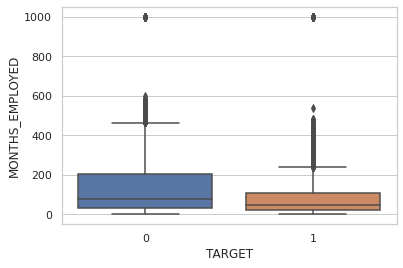

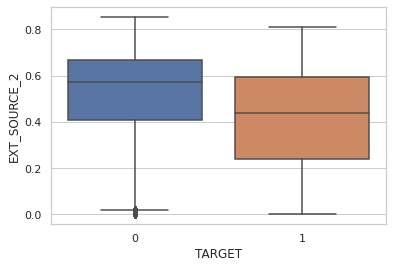

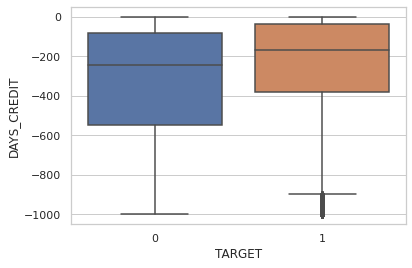

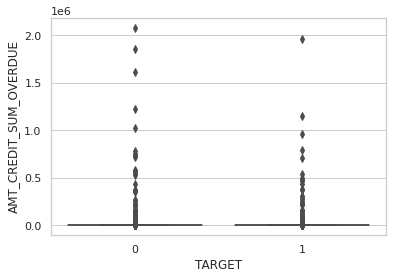

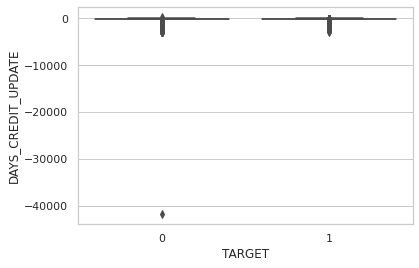

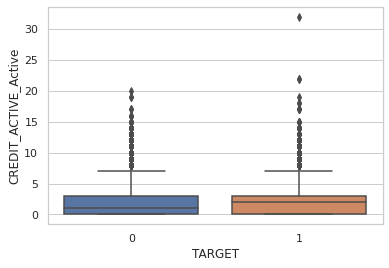

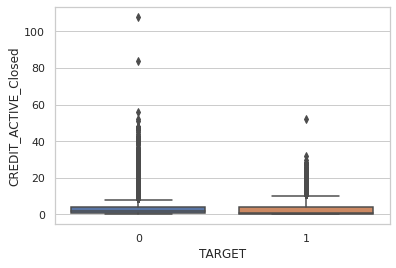

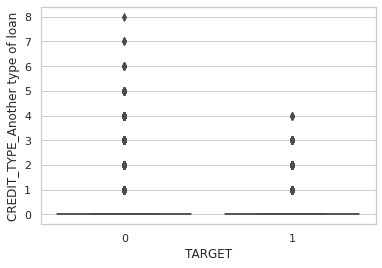

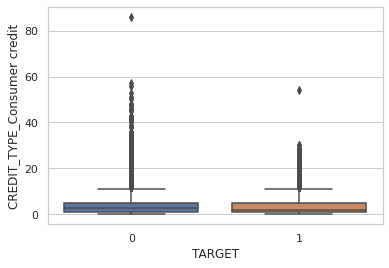

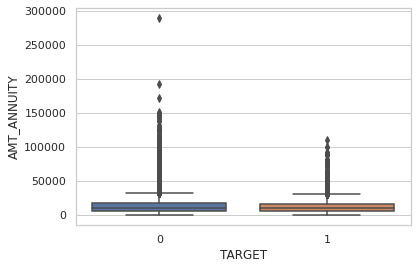

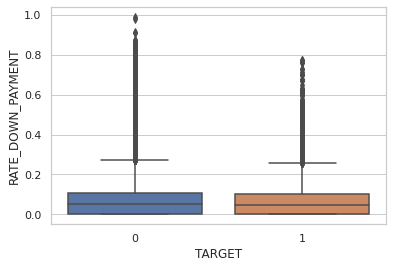

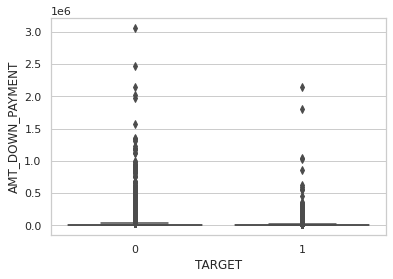

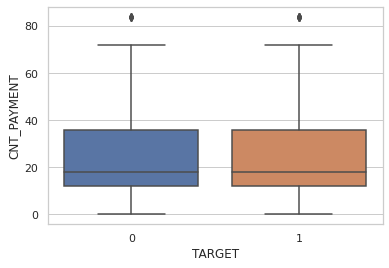

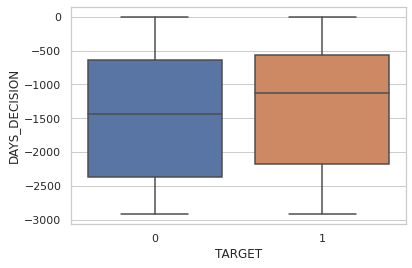

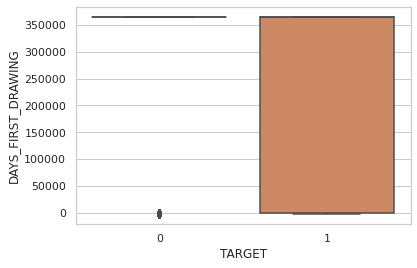

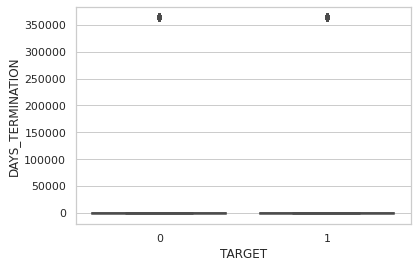

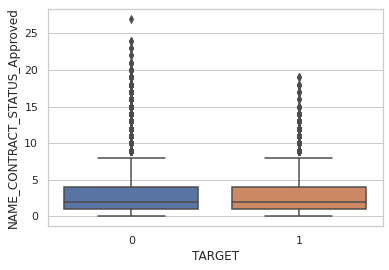

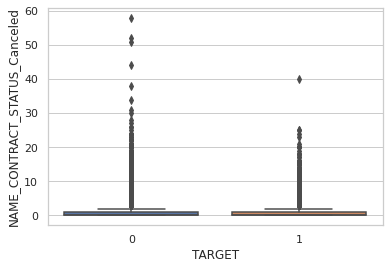

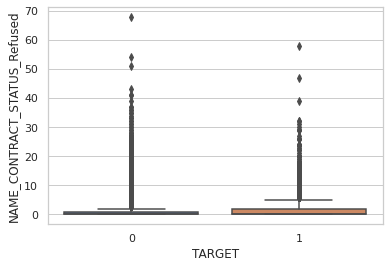

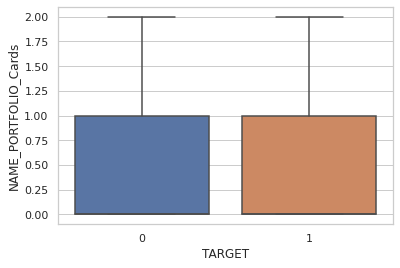

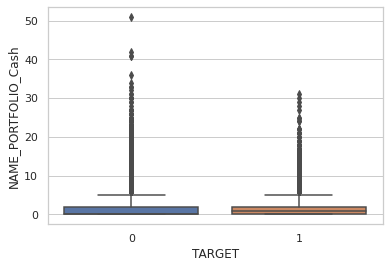

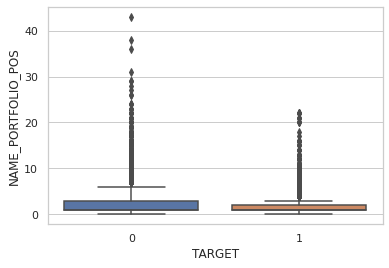

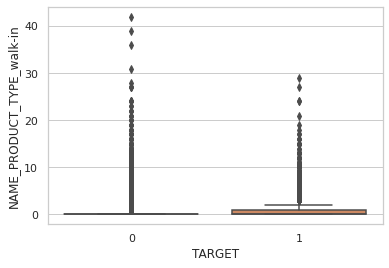

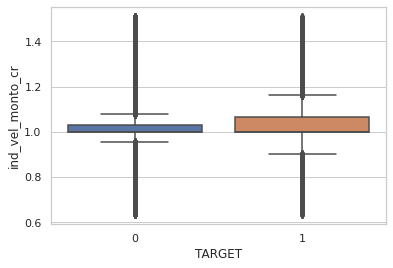

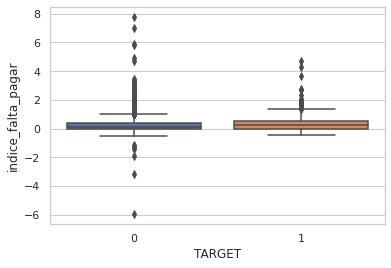

In [13]:
import seaborn as sns

sns.set_theme(style="whitegrid")
for i in Cuantitativas:
  ax = sns.boxplot(x=data['TARGET'],y=data[i])
  plt.show()

In [14]:
backup=data.copy()
# data=backup.copy()

Acciones

*** Se imputa los valores que están por encima del p.95% por dicho máx. 
Se organizan atípicos en la cuantitativa: 
* [OK] CNT_CHILDREN < 7 ***
* [OK] AMT_INCOME_TOTAL: Eliminar variable, pues más de 207 mil clientes de la BD tiene este valor = 0.
* [OK] AMT_CREDIT_x < 1350000 ***
* [OK] MONTHS_EMPLOYED < 300 ***
* [OK] DEF_30_CNT_SOCIAL_CIRCLE < 10 --> Convertirla en Categorica
* [OK] DEF_60_CNT_SOCIAL_CIRCLE < 10 --> Convertirla en Categorica
* [OK] AMT_CREDIT_SUM_OVERDUE < 40000 ***
* [OK] DAYS_CREDIT_UPDATE < 400 
* [OK] CREDIT_ACTIVE_Active < 6 ***
* [OK] CREDIT_ACTIVE_Closed < 10 ***
* [OK] CREDIT_TYPE_Consumer credit < 12 **
* [OK] CREDIT_TYPE_Microloan --> Convertirla en Categorica
* [OK] CREDIT_TYPE_Mortgage< 4 --> Convertirla en Categorica
* [OK] AMT_ANNUITY < 32051.23 ***
* [OK] AMT_DOWN_PAYMENT < 300000 **
* [OK] DAYS_TERMINATION > -2600
* [OK] NAME_CONTRACT_STATUS_Approved < 7 ***
* [OK] NAME_CONTRACT_STATUS_Canceled < 40 ***
* [OK] NAME_CONTRACT_STATUS_Refused < 40 ***
* [OK] NAME_CLIENT_TYPE_New --> Convertirla en Categorica
* [OK] NAME_PORTFOLIO_Cash < 7 ***
* [OK] NAME_PORTFOLIO_POS< 5 ***
* [OK] NAME_PRODUCT_TYPE_walk-in < 30 **
* [OK] indice_falta_pagar > -4 **
* [OK] FLAG_OWN_CAR --> Convertirla en Categorica
* [OK] REGION_RATING_CLIENT_W_CITY  --> Convertirla en Categorica
* [OK] NAME_INCOME_TYPE_State servant --> Convertirla en Categorica
* [OK] HOUSETYPE_MODE_Block of flats --> Convertirla en Categorica

In [15]:
data.drop(columns=['AMT_INCOME_TOTAL'],inplace=True)

In [16]:
data=data[data['DAYS_CREDIT_UPDATE']<=0]

In [17]:
data['CNT_CHILDREN']=data['CNT_CHILDREN'].apply(lambda x: 3 if x>3 else x)
data['AMT_INCOME_TOTAL']=data['CNT_CHILDREN'].apply(lambda x: 3 if x>3 else x)
data['AMT_CREDIT_x']=data['AMT_CREDIT_x'].apply(lambda x: 1350000 if x>1350000.0 else x)
data['MONTHS_EMPLOYED']=data['MONTHS_EMPLOYED'].apply(lambda x: 300 if x>300 else x)
data['AMT_CREDIT_SUM_OVERDUE']=data['AMT_CREDIT_SUM_OVERDUE'].apply(lambda x: 40000 if x>40000 else x)
data['DAYS_CREDIT_UPDATE']=data['DAYS_CREDIT_UPDATE'].apply(lambda x: -400 if abs(x)>400 else x)
data['CREDIT_ACTIVE_Active']=data['CREDIT_ACTIVE_Active'].apply(lambda x: 6 if x>6 else x)
data['CREDIT_ACTIVE_Closed']=data['CREDIT_ACTIVE_Closed'].apply(lambda x: 10 if x>10 else x)
data['CREDIT_TYPE_Consumer credit']=data['CREDIT_TYPE_Consumer credit'].apply(lambda x: 12 if x>12 else x)
data['AMT_DOWN_PAYMENT']=data['AMT_DOWN_PAYMENT'].apply(lambda x: 300000 if x>300000 else x)
data['AMT_DOWN_PAYMENT']=data['AMT_DOWN_PAYMENT'].apply(lambda x: 300000 if x>300000 else x)
data['AMT_ANNUITY']=data['AMT_ANNUITY'].apply(lambda x: 32051.23 if x>32051.23 else x)
data['DAYS_TERMINATION']=data['DAYS_TERMINATION'].apply(lambda x: (-1)*x if x>0 else x)
data['DAYS_TERMINATION']=data['DAYS_TERMINATION'].apply(lambda x: -2600 if abs(x)>2600 else x)
data['NAME_CONTRACT_STATUS_Approved']=data['NAME_CONTRACT_STATUS_Approved'].apply(lambda x: 7 if x>7 else x)
data['NAME_CONTRACT_STATUS_Canceled']=data['NAME_CONTRACT_STATUS_Canceled'].apply(lambda x: 6 if x>6 else x)
data['NAME_CONTRACT_STATUS_Refused']=data['NAME_CONTRACT_STATUS_Refused'].apply(lambda x: 7 if x>7 else x)
data['NAME_PORTFOLIO_Cash']=data['NAME_PORTFOLIO_Cash'].apply(lambda x: 7 if x>7 else x)
data['NAME_PORTFOLIO_POS']=data['NAME_PORTFOLIO_POS'].apply(lambda x: 5 if x>5 else x)
data['NAME_PRODUCT_TYPE_walk-in']=data['NAME_PRODUCT_TYPE_walk-in'].apply(lambda x: 5 if x>5 else x)
data['indice_falta_pagar']=data['indice_falta_pagar'].apply(lambda x: 5 if x>5 else x)
data['indice_falta_pagar']=data['indice_falta_pagar'].apply(lambda x: -5 if x<-5 else x)

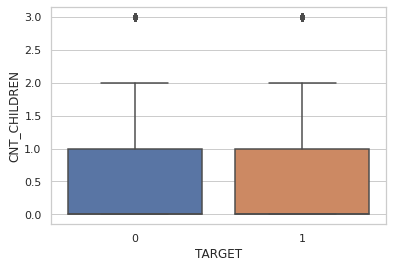

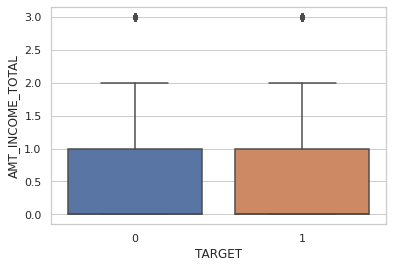

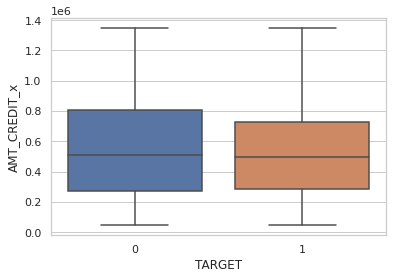

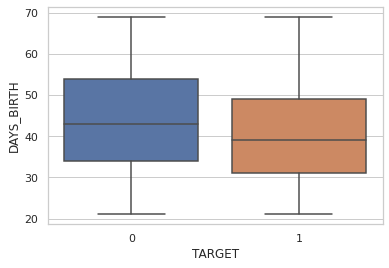

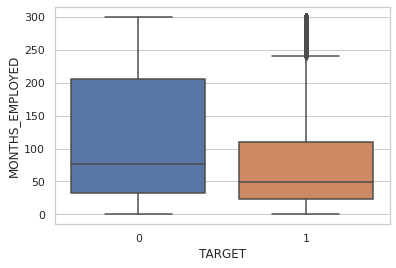

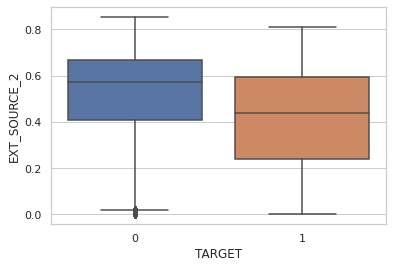

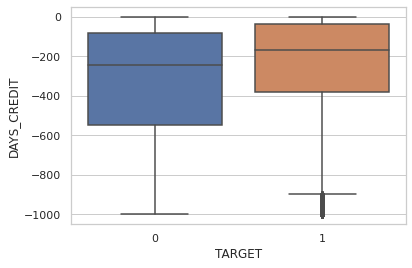

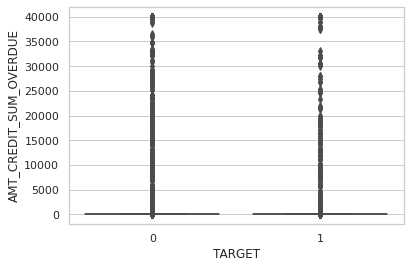

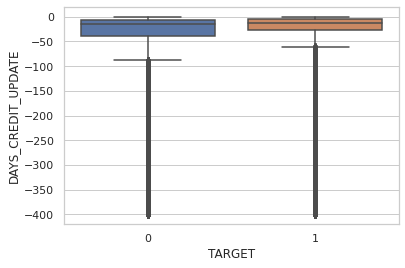

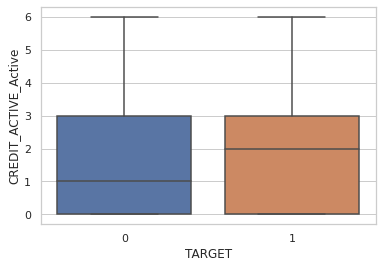

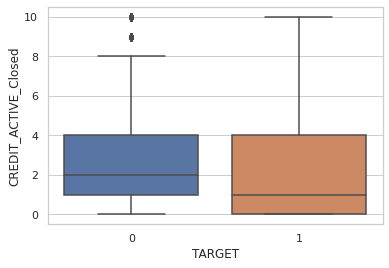

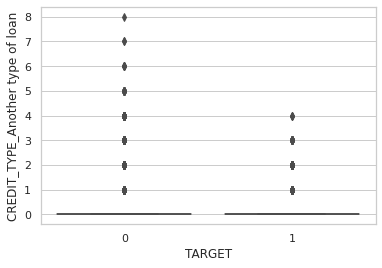

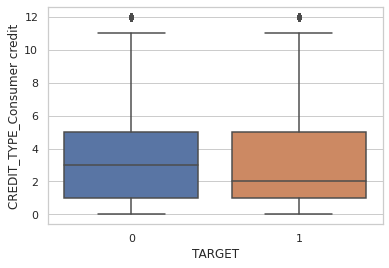

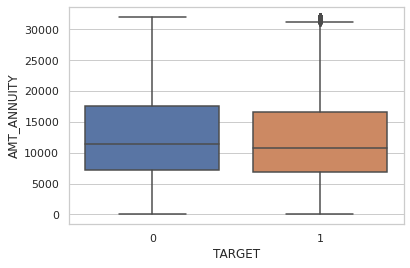

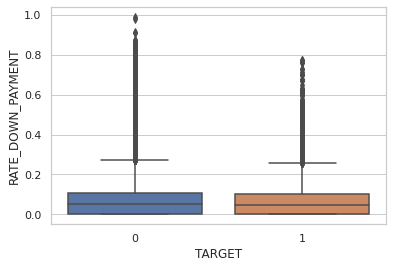

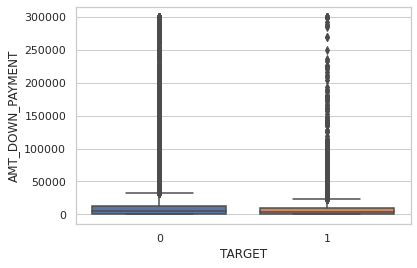

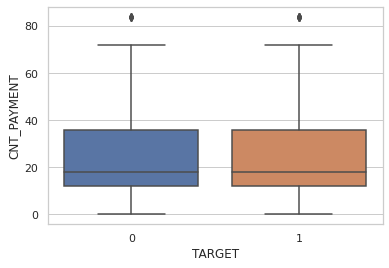

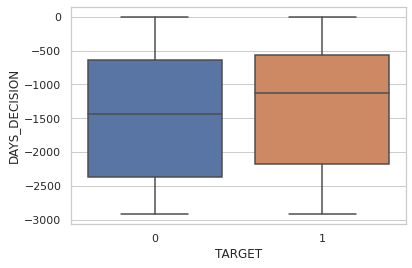

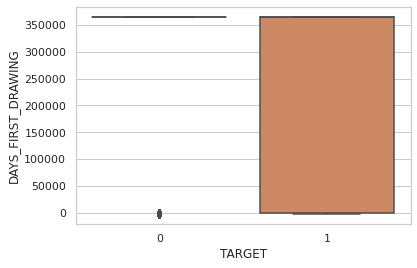

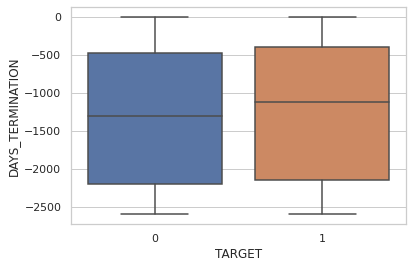

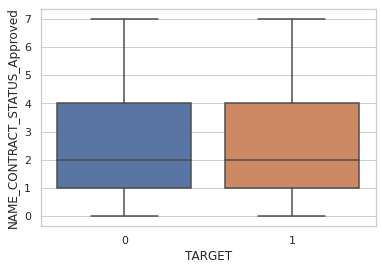

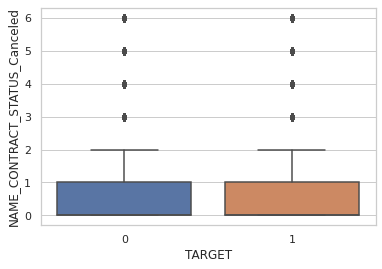

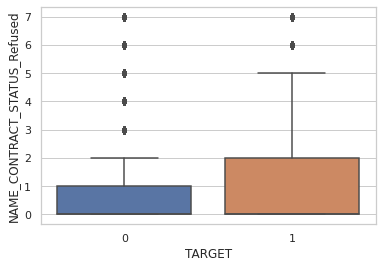

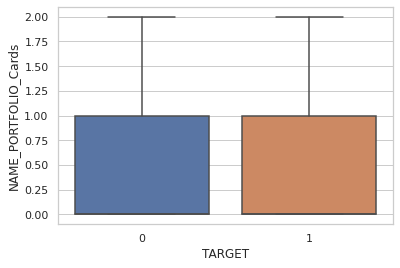

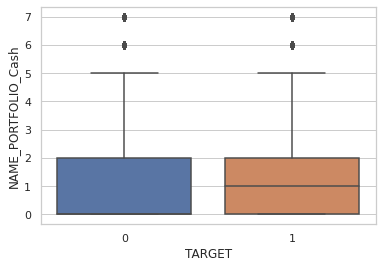

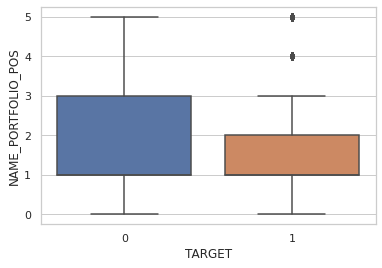

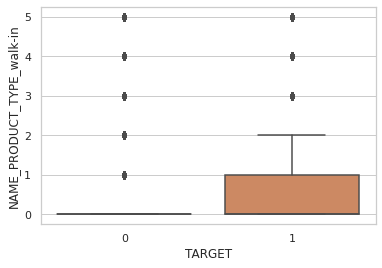

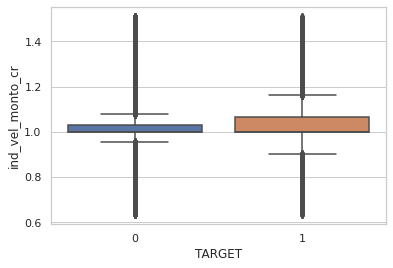

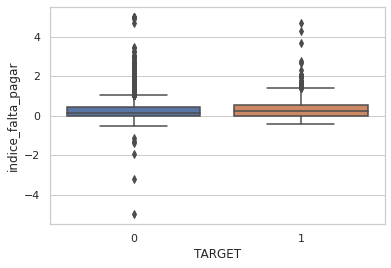

In [18]:
import seaborn as sns

sns.set_theme(style="whitegrid")
for i in Cuantitativas:
  ax = sns.boxplot(x=data['TARGET'],y=data[i])
  plt.show()

Se utilizó para determinar el punto crítico para definir atípicos en cada variable

```
variable='FLAG_OWN_CAR'
max=data[variable].max()
min=data[variable].min()
mean=data[variable][data[variable]<max][data[variable]>min].mean()
max,mean,sorted(data[variable][data[variable]<max],reverse=True)[0:5]


critico=np.percentile(data[variable][data[variable]<max][data[variable]>min],95)
data[variable][data[variable]<critico].count()/data.shape[0], data[variable][data[variable]>=critico].count()/data.shape[0], critico


sns.set_theme(style="whitegrid")
# ax = sns.boxplot(x=data['TARGET'][data['CNT_CHILDREN']<700000],y=data['CNT_CHILDREN'][data['CNT_CHILDREN']<700000])
ax = sns.boxplot(x=backup['TARGET'],y=backup[variable][backup[variable]<critico])
plt.show()
```



In [19]:
data.shape

(295221, 61)

Una vez revisada variable por variable y sus atípicos, se realiza la prueba ANOVA:

Como el valor p es menor a 0.05, se buscará rechazar la hipótesis nula o $H_0$, con el fin de identificar si hay una diferencia significativa estadísticamente entre las medias de la clase 0 y 1.



In [20]:
Cuantitativas.remove('AMT_INCOME_TOTAL')

In [21]:
from scipy.stats import f_oneway # Modelo de un factor ANOVA basado en F-distribución

dif=[]
no_dif=[]
for i in Cuantitativas:
  f_valores, p_valor = f_oneway(data[i], data['TARGET'])
  if p_valor<0.05: 
    dif.append(i)
  else: 
    no_dif.append(i)

print(f"SÍ hay diferencia significativa entre las medias de la variable TARGET: {len(dif)} \n   {dif} \n")
print(f"No hay diferencia significativa entre las medias de la variable TARGET: {len(no_dif)} \n   {no_dif}")

SÍ hay diferencia significativa entre las medias de la variable TARGET: 28 
   ['CNT_CHILDREN', 'AMT_CREDIT_x', 'DAYS_BIRTH', 'MONTHS_EMPLOYED', 'EXT_SOURCE_2', 'DAYS_CREDIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'CREDIT_ACTIVE_Active', 'CREDIT_ACTIVE_Closed', 'CREDIT_TYPE_Another type of loan', 'CREDIT_TYPE_Consumer credit', 'AMT_ANNUITY', 'RATE_DOWN_PAYMENT', 'AMT_DOWN_PAYMENT', 'CNT_PAYMENT', 'DAYS_DECISION', 'DAYS_FIRST_DRAWING', 'DAYS_TERMINATION', 'NAME_CONTRACT_STATUS_Approved', 'NAME_CONTRACT_STATUS_Canceled', 'NAME_CONTRACT_STATUS_Refused', 'NAME_PORTFOLIO_Cards', 'NAME_PORTFOLIO_Cash', 'NAME_PORTFOLIO_POS', 'NAME_PRODUCT_TYPE_walk-in', 'ind_vel_monto_cr', 'indice_falta_pagar'] 

No hay diferencia significativa entre las medias de la variable TARGET: 0 
   []


Se concluye que todas las variables son significativas para el ejercicio

#####3.3.2.1 Cualitativas


In [22]:
b=[]
n=0
m=0

for i in data[Categoricas].columns.drop('TARGET'):
  b.append([])
  for j in range(2):
    b[n].append([])
    for k in range(2):
      dat=data[['TARGET',i]]
      if m==0:
        b[n][m].append(dat[(dat['TARGET']==j) & (dat[i]==k)].shape[0])
      else:
        b[n][m].append(dat[(dat['TARGET']==j) & (dat[i]==k)].shape[0])
    m+=1
  m=0
  n+=1

In [23]:
n=0
ancho_barras =0.35

In [24]:
Revisa_Cant_Categoricas=[]
for i in range(len(b)):
  # plt.bar([0,1], b[i][n],width=ancho_barras,label='TARGET 0')
  # plt.bar([0.35,1.35],b[i][n+1], width=ancho_barras, label='TARGET 1')
  # plt.legend(loc='best')
  # plt.xticks([0.175,1.175], ('0','1'))
  # plt.ylabel('Frecuencia')
  # plt.xlabel(data[Categoricas].columns.drop('TARGET')[i])
  # plt.title(data[Categoricas].columns.drop('TARGET')[i])
  Revisa_Cant_Categoricas.append((data[Categoricas].columns.drop('TARGET')[i],b[i][n][0],b[i][n][1],b[i][n+1][0],b[i][n+1][1]))
  # print(f"{data[Categoricas].columns.drop('TARGET')[i]}: \n   Cat1: {b[i][n]} & Cat2: {b[i][n+1]}")
  # plt.show()

In [25]:
pd.DataFrame(Revisa_Cant_Categoricas,columns=['Vairbale','Cat1 - T0','Cat1 - T1','Cat2 - T2','Cat2 - T2'])

,Vairbale,Cat1 - T0,Cat1 - T1,Cat2 - T2,Cat2 - T2
0,NAME_INCOME_TYPE_Businessman,271377,4,23840,0
1,NAME_INCOME_TYPE_Commercial associate,209437,61944,18783,5057
2,NAME_INCOME_TYPE_Others,271361,20,23839,1
3,NAME_INCOME_TYPE_Pensioner,220540,50841,20951,2889
4,NAME_INCOME_TYPE_Working,132396,138985,9149,14691
5,NAME_EDUCATION_TYPE_Higher education,205694,65687,20098,3742
6,NAME_EDUCATION_TYPE_Incomplete higher,262411,8970,23009,831
7,NAME_EDUCATION_TYPE_Lower secondary,268059,3322,23432,408
8,NAME_EDUCATION_TYPE_Secondary / secondary special,78119,193262,4984,18856
9,NAME_HOUSING_TYPE_House / apartment,29973,241408,3426,20414


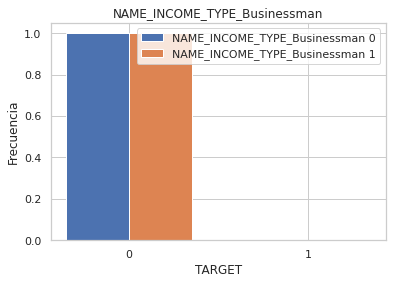

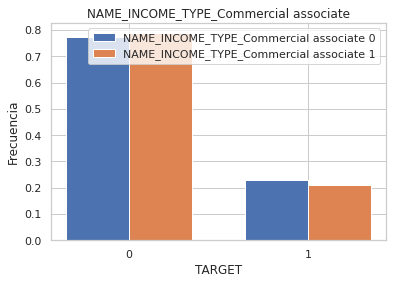

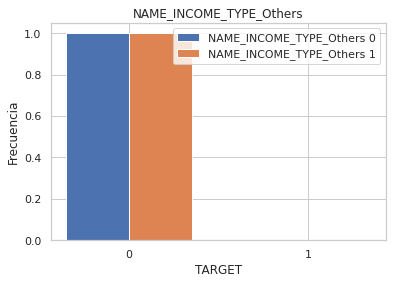

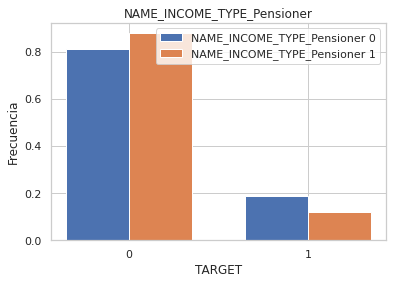

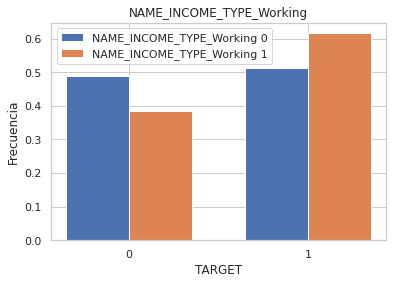

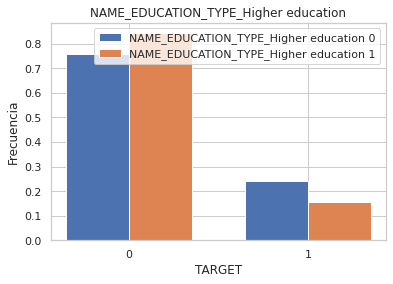

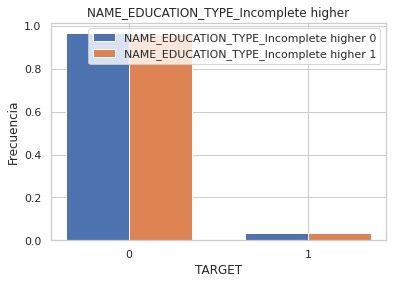

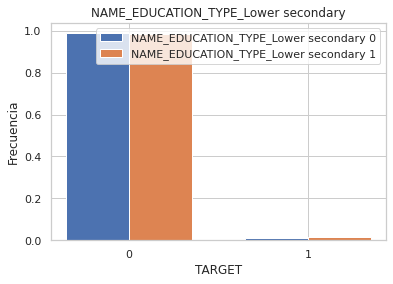

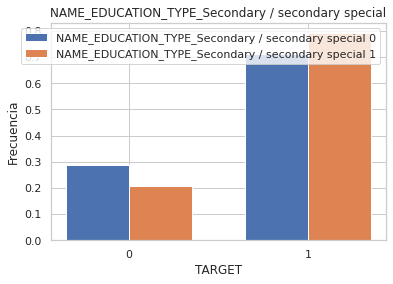

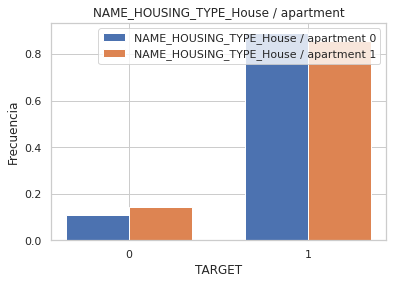

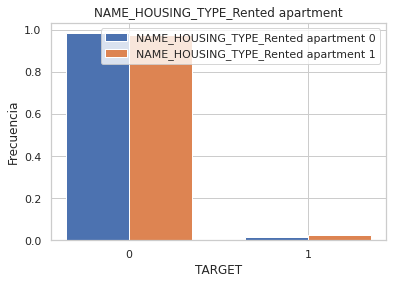

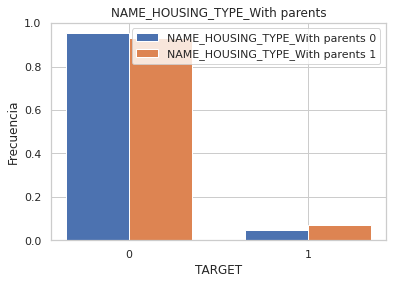

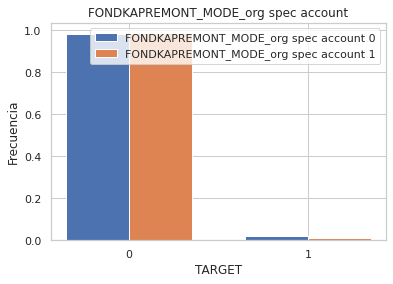

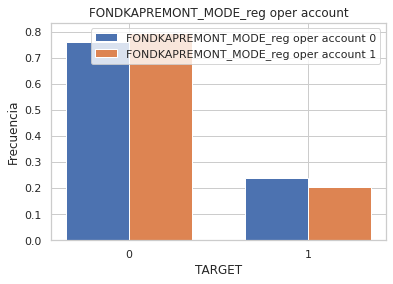

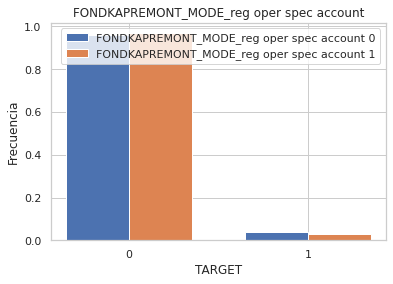

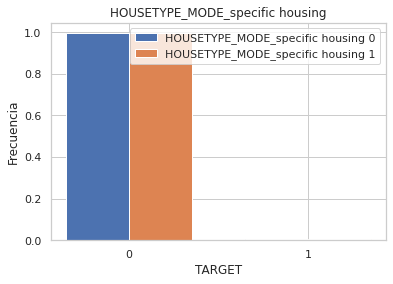

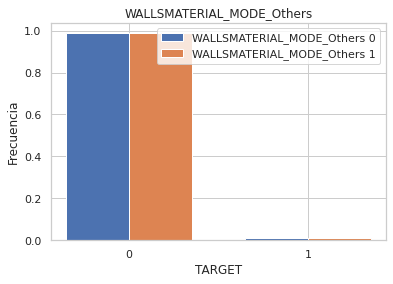

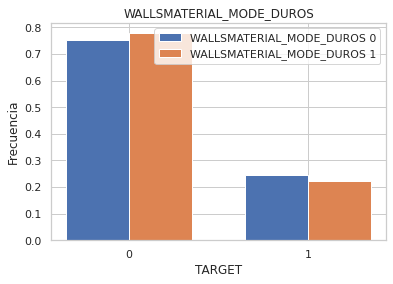

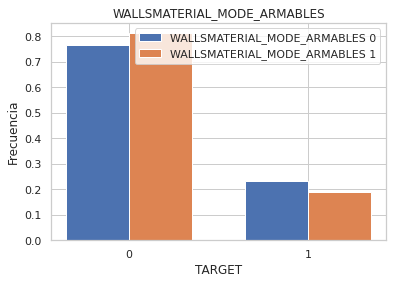

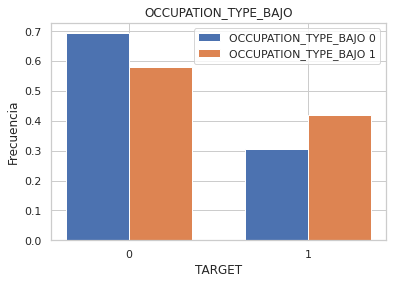

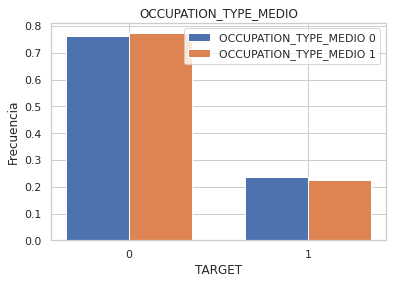

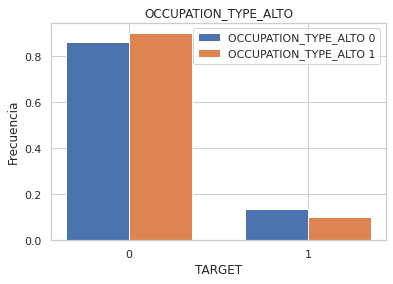

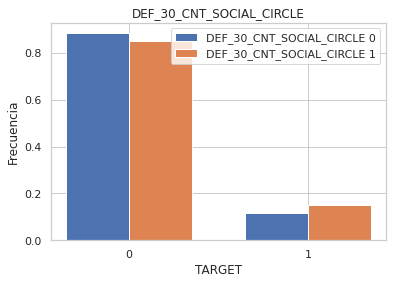

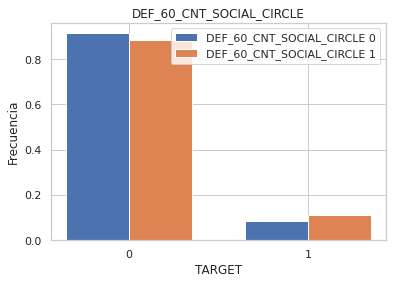

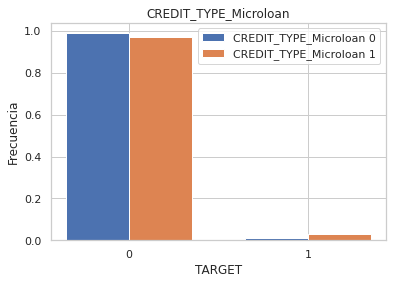

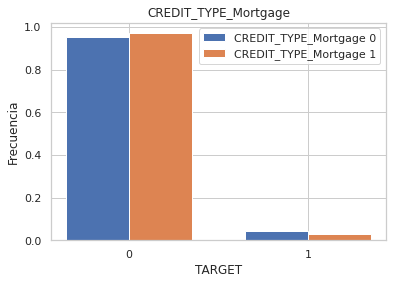

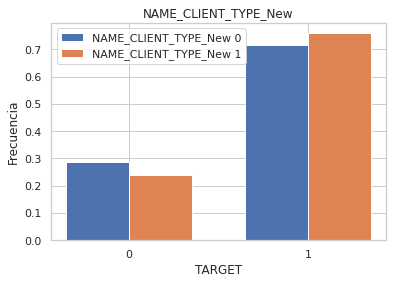

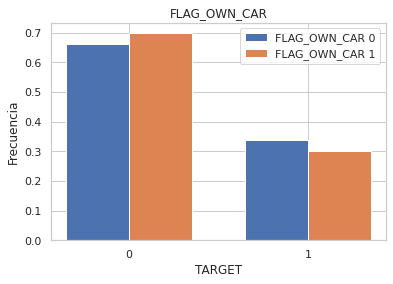

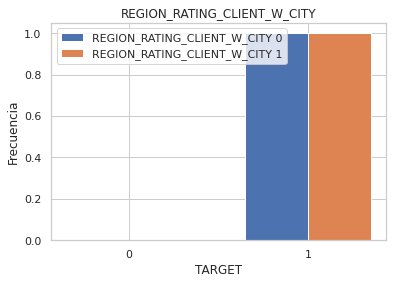

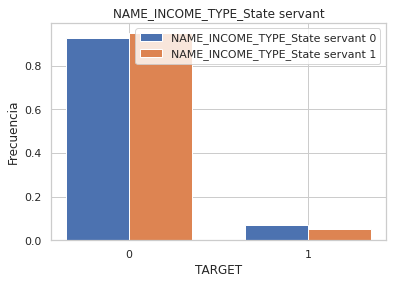

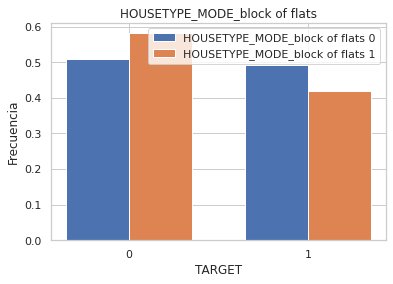

In [26]:
for i in range(len(b)):
  plt.bar([0,1], [b[i][n][0]/(b[i][n][0]+b[i][n][1]),b[i][n][1]/(b[i][n][0]+b[i][n][1])],width=ancho_barras,label=data[Categoricas].columns.drop('TARGET')[i]+' 0')
  plt.bar([0.35,1.35],[b[i][n+1][0]/(b[i][n+1][0]+b[i][n+1][1]),b[i][n+1][1]/(b[i][n+1][0]+b[i][n+1][1])], width=ancho_barras, label=data[Categoricas].columns.drop('TARGET')[i]+' 1')
  plt.legend(loc='best')
  plt.xticks([0.175,1.175], ('0','1'))
  plt.ylabel('Frecuencia')
  plt.xlabel('TARGET')
  plt.title(data[Categoricas].columns.drop('TARGET')[i])
  plt.show()

In [27]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} es IMPORTANTE para la predicción".format(colX)
        else:
            result="{0} no es una feature importante. (Descartar {0} del modelo)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index =                                                       self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [28]:
#Initialize ChiSquare Class
cT = ChiSquare(data)
#categorical variables: las que en data.info son objetos
testCol = Categoricas

In [29]:
for var in Categoricas[1:]:
    cT.TestIndependence(colX=var,colY='TARGET')

NAME_INCOME_TYPE_Businessman no es una feature importante. (Descartar NAME_INCOME_TYPE_Businessman del modelo)
NAME_INCOME_TYPE_Commercial associate es IMPORTANTE para la predicción
NAME_INCOME_TYPE_Others no es una feature importante. (Descartar NAME_INCOME_TYPE_Others del modelo)
NAME_INCOME_TYPE_Pensioner es IMPORTANTE para la predicción
NAME_INCOME_TYPE_Working es IMPORTANTE para la predicción
NAME_EDUCATION_TYPE_Higher education es IMPORTANTE para la predicción
NAME_EDUCATION_TYPE_Incomplete higher no es una feature importante. (Descartar NAME_EDUCATION_TYPE_Incomplete higher del modelo)
NAME_EDUCATION_TYPE_Lower secondary es IMPORTANTE para la predicción
NAME_EDUCATION_TYPE_Secondary / secondary special es IMPORTANTE para la predicción
NAME_HOUSING_TYPE_House / apartment es IMPORTANTE para la predicción
NAME_HOUSING_TYPE_Rented apartment es IMPORTANTE para la predicción
NAME_HOUSING_TYPE_With parents es IMPORTANTE para la predicción
FONDKAPREMONT_MODE_org spec account es IMPORTAN

Después de revisar nuevamente la chi-cuadrado, las siguientes variables no dan relevantes:
* NAME_INCOME_TYPE_Businessman
* NAME_INCOME_TYPE_Others
* NAME_EDUCATION_TYPE_Incomplete higher 
* WALLSMATERIAL_MODE_Others

## 3.4 Limpieza de los datos: Nulos, Atípicos, Registros Duplicados


In [30]:
data.isnull().sum().sum()

0

In [31]:
data.duplicated().sum()

0

## 3.5 Análisis de Correlaciones

In [32]:
newdf = data.iloc[:,1:].select_dtypes(include=['int64','float64'])
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295221 entries, 0 to 295236
Data columns (total 29 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CNT_CHILDREN                      295221 non-null  float64
 1   AMT_CREDIT_x                      295221 non-null  float64
 2   DAYS_BIRTH                        295221 non-null  float64
 3   MONTHS_EMPLOYED                   295221 non-null  float64
 4   EXT_SOURCE_2                      295221 non-null  float64
 5   DAYS_CREDIT                       295221 non-null  float64
 6   AMT_CREDIT_SUM_OVERDUE            295221 non-null  float64
 7   DAYS_CREDIT_UPDATE                295221 non-null  float64
 8   CREDIT_ACTIVE_Active              295221 non-null  float64
 9   CREDIT_ACTIVE_Closed              295221 non-null  float64
 10  CREDIT_TYPE_Another type of loan  295221 non-null  float64
 11  CREDIT_TYPE_Consumer credit       295221 non-null  f

In [33]:
newdf_corr = newdf.corr()

In [34]:
corr_media_alta=[]
for i in newdf_corr.columns:
  for j in newdf_corr.columns:
    if i!=j:
      if newdf_corr[i][j]>=0.7:
        correlacion=round(newdf_corr[i][j],4)
        corr_media_alta.append((i,j,correlacion))

In [35]:
pd.DataFrame(corr_media_alta,columns=['Variable1','Variable2','Correlacion'])

,Variable1,Variable2,Correlacion
0,CNT_CHILDREN,AMT_INCOME_TOTAL,1.0000
1,CREDIT_ACTIVE_Closed,CREDIT_TYPE_Consumer credit,0.9267
2,CREDIT_TYPE_Consumer credit,CREDIT_ACTIVE_Closed,0.9267
3,AMT_INCOME_TOTAL,CNT_CHILDREN,1.0000


No se elimina ninguna de las variables ya que ambas son importantes y aportan información diferente.

# 4. Guardar Nueva Data

In [36]:
data.shape

(295221, 61)

In [37]:
data.to_csv('15-DF_Final_60cols.csv') 
files.download('15-DF_Final_60cols.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>